In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/NBA_2024_Shots.csv'  # Update this with the correct path to your data
nba_data = pd.read_csv('/content/NBA_2024_Shots.csv')

# Filter relevant columns
filtered_data = nba_data[['PLAYER_NAME', 'ACTION_TYPE', 'BASIC_ZONE', 'SHOT_DISTANCE', 'ZONE_RANGE', 'SHOT_MADE']]

# Drop missing values
filtered_data = filtered_data.dropna()

# Convert SHOT_MADE to boolean
filtered_data['SHOT_MADE'] = filtered_data['SHOT_MADE'].astype(bool)

# Group by PLAYER_NAME, ACTION_TYPE, and BASIC_ZONE
grouped_data = filtered_data.groupby(
    ['PLAYER_NAME', 'ACTION_TYPE', 'BASIC_ZONE']
).agg(
    Total_Shots=('SHOT_MADE', 'count'),
    Shots_Made=('SHOT_MADE', 'sum')
).reset_index()

# Calculate success percentage
grouped_data['Success_Percentage'] = (grouped_data['Shots_Made'] / grouped_data['Total_Shots']) * 100

# Include only rows where Total_Shots > 20
filtered_grouped_data = grouped_data[grouped_data['Total_Shots'] > 20]

# Save the filtered data to a CSV file in the current working directory
output_path = 'Player_Success_Filtered.csv'
filtered_grouped_data.to_csv(output_path, index=False)

print(f"Filtered data saved to: {output_path}")



FileNotFoundError: [Errno 2] No such file or directory: '/content/NBA_2024_Shots.csv'

Enter the player's name: Payton Pritchard


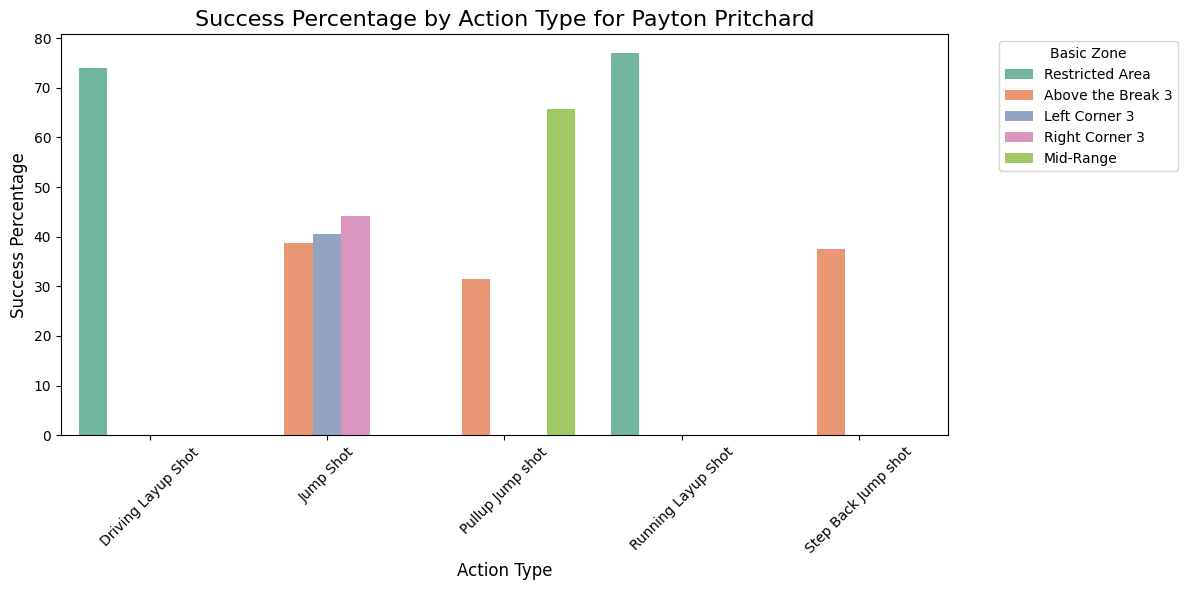

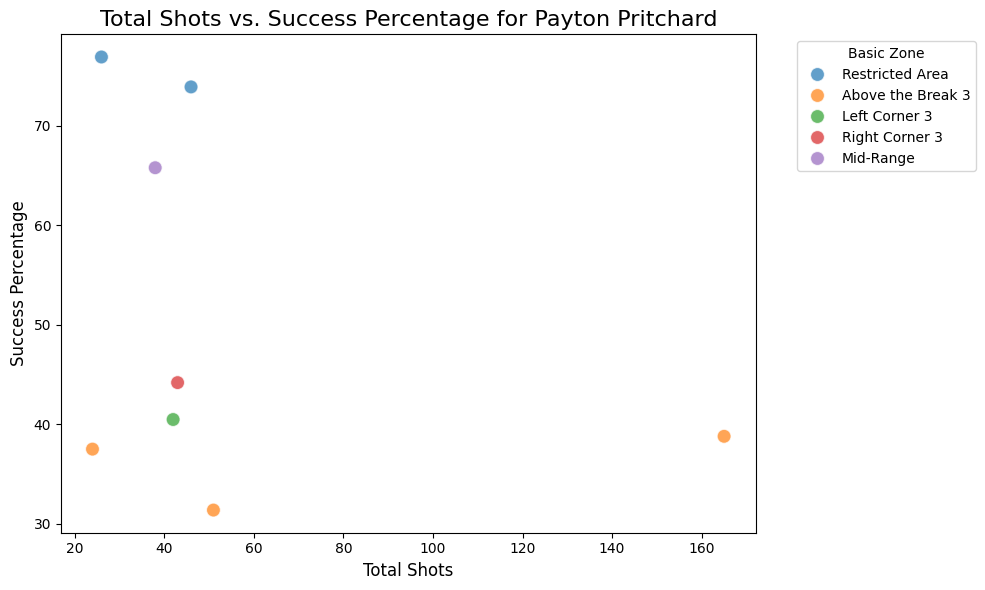

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered data
file_path = 'Player_Success_Filtered.csv'  # Update this with the correct path if needed
filtered_grouped_data = pd.read_csv('/content/Player_Success_Filtered.csv')

# Function to visualize data for a specific player
def visualize_player_data(player_name=None):
    # Filter data for the selected player
    player_data = filtered_grouped_data[filtered_grouped_data['PLAYER_NAME'] == player_name]

    if player_data.empty:
        print(f"No data found for player: {player_name}")
        return

    # Bar Plot: Success Percentage by Action Type
    plt.figure(figsize=(12, 6))
    sns.barplot(data=player_data, x='ACTION_TYPE', y='Success_Percentage', hue='BASIC_ZONE', palette='Set2')
    plt.title(f'Success Percentage by Action Type for {player_name}', fontsize=16)
    plt.ylabel('Success Percentage', fontsize=12)
    plt.xlabel('Action Type', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Basic Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Scatter Plot: Total Shots vs. Success Percentage
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=player_data, x='Total_Shots', y='Success_Percentage', hue='BASIC_ZONE', palette='tab10', s=100, alpha=0.7)
    plt.title(f'Total Shots vs. Success Percentage for {player_name}', fontsize=16)
    plt.xlabel('Total Shots', fontsize=12)
    plt.ylabel('Success Percentage', fontsize=12)
    plt.legend(title='Basic Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example Usage
# Replace 'Jordan Poole' with any player name from your dataset
player_name = input("Enter the player's name: ")
visualize_player_data(player_name)


Enter the player's name: LeBron James


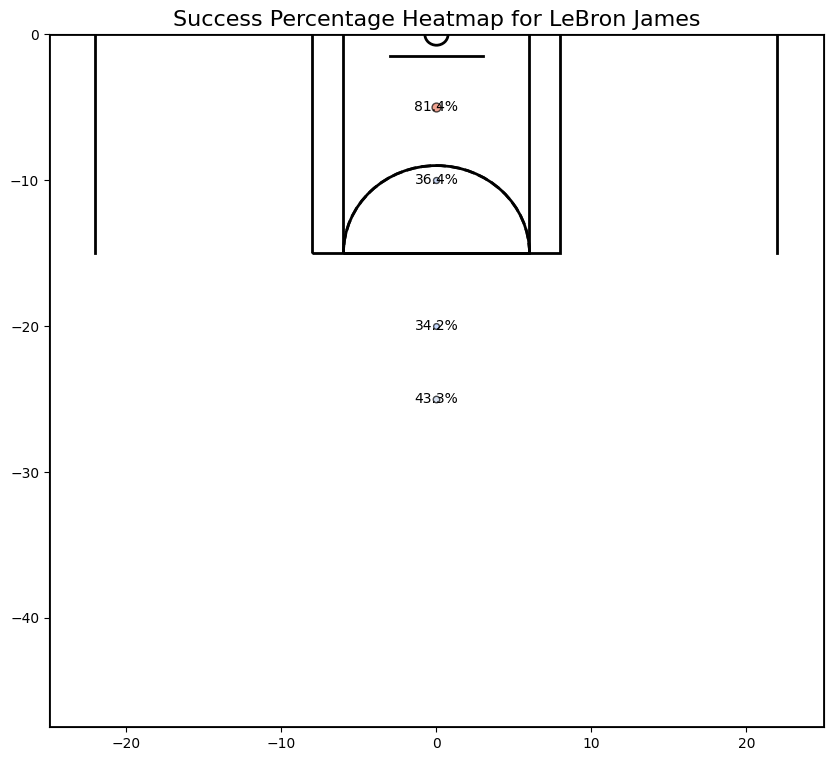

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Arc, Circle, Rectangle

# Load the filtered data
file_path = '/content/Player_Success_Filtered.csv'  # Update this with the correct path if needed
filtered_grouped_data = pd.read_csv('/content/Player_Success_Filtered.csv')

# Function to draw a basketball court
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    # Hoop
    hoop = Circle((0, 0), radius=0.75, linewidth=lw, color=color, fill=False)

    # Backboard
    backboard = plt.Line2D([-3, 3], [-1.5, -1.5], linewidth=lw, color=color)

    # Paint
    outer_box = Rectangle((-8, -15), 16, 19, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-6, -15), 12, 19, linewidth=lw, color=color, fill=False)

    # Free throw circle
    free_throw = Arc((0, -15), 12, 12, theta1=0, theta2=180, linewidth=lw, color=color)
    free_throw_inner = Arc((0, -15), 12, 12, theta1=0, theta2=180, linewidth=lw, color=color, linestyle='dashed')

    # Three-point line
    three_point_arc = Arc((0, 0), 47.5, 47.5, theta1=0, theta2=180, linewidth=lw, color=color)
    three_point_line_left = plt.Line2D([-22, -22], [-15, 0], linewidth=lw, color=color)
    three_point_line_right = plt.Line2D([22, 22], [-15, 0], linewidth=lw, color=color)

    # Restricted area
    restricted = Arc((0, 0), 8, 8, theta1=0, theta2=180, linewidth=lw, color=color)

    # List of court elements to be plotted
    court_elements = [hoop, backboard, outer_box, inner_box, free_throw, free_throw_inner,
                      three_point_arc, three_point_line_left, three_point_line_right, restricted]

    for element in court_elements:
        if isinstance(element, plt.Line2D):
            ax.add_line(element)
        else:
            ax.add_patch(element)

    if outer_lines:
        # Outer line (court boundary)
        outer_lines = Rectangle((-25, -47.5), 50, 47.5, linewidth=lw, color=color, fill=False)
        ax.add_patch(outer_lines)

    return ax

# Function to visualize heatmap for a specific player
def visualize_player_heatmap(player_name=None):
    # Filter data for the selected player
    player_data = filtered_grouped_data[filtered_grouped_data['PLAYER_NAME'] == player_name]

    if player_data.empty:
        print(f"No data found for player: {player_name}")
        return

    # Prepare data for plotting
    zones = player_data['BASIC_ZONE'].unique()
    zone_mapping = {
        "Restricted Area": (0, -5),
        "In The Paint (Non-RA)": (0, -10),
        "Mid-Range": (0, -20),
        "Left Corner 3": (-5, 5),
        "Right Corner 3": (20, 5),
        "Above the Break 3": (0, -25),
    }

    heatmap_data = []
    for zone in zones:
        if zone in zone_mapping:
            x, y = zone_mapping[zone]
            success = player_data[player_data['BASIC_ZONE'] == zone]['Success_Percentage'].values[0]
            heatmap_data.append((x, y, success))

    # Draw court
    fig, ax = plt.subplots(figsize=(10, 9))
    draw_court(ax, outer_lines=True)
    ax.set_xlim(-25, 25)
    ax.set_ylim(-47.5, 0)

    # Plot heatmap values
    cmap = plt.colormaps.get_cmap('coolwarm')  # Updated to new Matplotlib colormap syntax
    for x, y, success in heatmap_data:
        size = success * 0.5  # Scale marker size by success percentage
        color = cmap(success / 100)  # Normalize success percentage for colormap
        ax.scatter(x, y, s=size, c=[color], alpha=0.7, edgecolors='black')
        ax.text(x, y, f"{success:.1f}%", ha='center', va='center', fontsize=10, color='black')

    ax.set_title(f'Success Percentage Heatmap for {player_name}', fontsize=16)
    plt.show()

# Example Usage
player_name = input("Enter the player's name: ")
visualize_player_heatmap(player_name)

